In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('biomassdata.csv')

In [4]:
df.head(5)

,Season,Experiment No,Solar intensity,Air Temp,Relative Humidity,Culture Temp,Dissolved Oxygen,pH,Actual Average Biomass Concentration
0,Summer,1,540,35.4,65,33.4,10.1,9.1,0.83
1,Summer,2,620,38.0,70,36.1,9.4,8.9,0.71
2,Summer,3,640,39.0,70,37.3,10.8,9.6,0.68
3,Summer,4,580,37.4,74,35.6,10.4,8.5,0.73
4,Monsoon,1,510,34.0,78,32.1,8.8,7.8,0.33


In [5]:
df.columns

Index(['Season', 'Experiment No ', 'Solar intensity ', 'Air Temp',
       'Relative Humidity ', 'Culture Temp', 'Dissolved Oxygen', 'pH',
       'Actual Average Biomass Concentration '],
      dtype='object')

In [6]:
df.drop(columns=['Experiment No '], inplace=True)

In [7]:
df.rename(columns={'Solar intensity ':'Solar_Intensity','Air Temp':'Air_Temp','Relative Humidity ':'Relative_Humidity',
                   'Culture Temp':'Culture_Temp','Dissolved Oxygen':'Dissolved_Oxygen','Actual Average Biomass Concentration ':'Biomass_Concentration'},inplace=True)

In [8]:
df.head(5)

,Season,Solar_Intensity,Air_Temp,Relative_Humidity,Culture_Temp,Dissolved_Oxygen,pH,Biomass_Concentration
0,Summer,540,35.4,65,33.4,10.1,9.1,0.83
1,Summer,620,38.0,70,36.1,9.4,8.9,0.71
2,Summer,640,39.0,70,37.3,10.8,9.6,0.68
3,Summer,580,37.4,74,35.6,10.4,8.5,0.73
4,Monsoon,510,34.0,78,32.1,8.8,7.8,0.33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 12 non-null     object 
 1   Solar_Intensity        12 non-null     int64  
 2   Air_Temp               12 non-null     float64
 3   Relative_Humidity      12 non-null     int64  
 4   Culture_Temp           12 non-null     float64
 5   Dissolved_Oxygen       12 non-null     float64
 6   pH                     12 non-null     float64
 7   Biomass_Concentration  12 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 900.0+ bytes


In [10]:
df.describe()

,Solar_Intensity,Air_Temp,Relative_Humidity,Culture_Temp,Dissolved_Oxygen,pH,Biomass_Concentration
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,506.666667,33.283333,70.416667,30.750000,9.916667,8.808333,0.610833
std,77.057633,3.916825,7.774765,4.848711,1.475148,0.651513,0.218984
min,405.000000,27.000000,58.000000,22.000000,7.200000,7.700000,0.290000
25%,438.750000,30.500000,64.500000,27.500000,9.250000,8.400000,0.352500
50%,505.000000,33.700000,70.000000,31.700000,10.300000,9.000000,0.700000
75%,550.000000,35.900000,75.750000,33.950000,10.825000,9.325000,0.777500
max,640.000000,39.000000,82.000000,37.300000,11.800000,9.600000,0.830000


In [12]:
# Checking for missing values
df.isnull().sum()

Season                   0
Solar_Intensity          0
Air_Temp                 0
Relative_Humidity        0
Culture_Temp             0
Dissolved_Oxygen         0
pH                       0
Biomass_Concentration    0
dtype: int64

In [13]:
df.shape

(12, 8)

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X

,Season,Solar_Intensity,Air_Temp,Relative_Humidity,Culture_Temp,Dissolved_Oxygen,pH
0,Summer,540,35.4,65,33.4,10.1,9.1
1,Summer,620,38.0,70,36.1,9.4,8.9
2,Summer,640,39.0,70,37.3,10.8,9.6
3,Summer,580,37.4,74,35.6,10.4,8.5
4,Monsoon,510,34.0,78,32.1,8.8,7.8
5,Monsoon,480,33.4,82,31.3,7.2,7.7
6,Monsoon,510,34.2,80,32.2,7.4,8.1
7,Monsoon,500,33.0,75,31.0,10.2,8.7
8,Winter,440,31.0,70,28.0,10.4,9.2
9,Winter,435,28.0,60,24.0,11.8,9.4


In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

- Encoding ordinal categorical variable season into numerical feature 

In [28]:
oe = OrdinalEncoder(categories=[['Monsoon','Summer','Winter']])
X['Season'] = oe.fit_transform(X[['Season']])

- As we don't have separate test data so we will split data into train and test
- train data to train the model
- And, test data to check model performance how efficient our model can predict

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

# Linear regression 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

In [31]:
# Train the lr model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
# predicted value of 2 test points by lr model of biomass
y_pred = lr.predict(X_test)

In [33]:
y_pred

array([0.7484739 , 0.26458201])

In [34]:
X_test

,Season,Solar_Intensity,Air_Temp,Relative_Humidity,Culture_Temp,Dissolved_Oxygen,pH
9,2.0,435,28.0,60,24.0,11.8,9.4
5,0.0,480,33.4,82,31.3,7.2,7.7


In [35]:
y_test

9    0.80
5    0.31
Name: Biomass_Concentration, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## LR regression metrics

In [37]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score:', r2_score(y_test,y_pred))

MAE: 0.0484720443713271
MSE: 0.0023588663478799382
RMSE: 0.048568161874626654
R2_Score: 0.9607019350623917


In [38]:
#checking of adjusted R2 score with my code
r2=(r2_score(y_test,y_pred))


In [39]:
X_test.shape

(2, 7)

In [40]:
1 - ((1-r2)* (7-1)/(7-1-2))

0.9410529025935874

# feature importance of lr model

In [41]:
import matplotlib.pyplot as plt

             Feature  Coefficient
0             Season     0.117867
1    Solar_Intensity    -0.003182
2           Air_Temp     0.139107
3  Relative_Humidity    -0.029102
4       Culture_Temp    -0.035598
5   Dissolved_Oxygen     0.023550
6                 pH    -0.089569


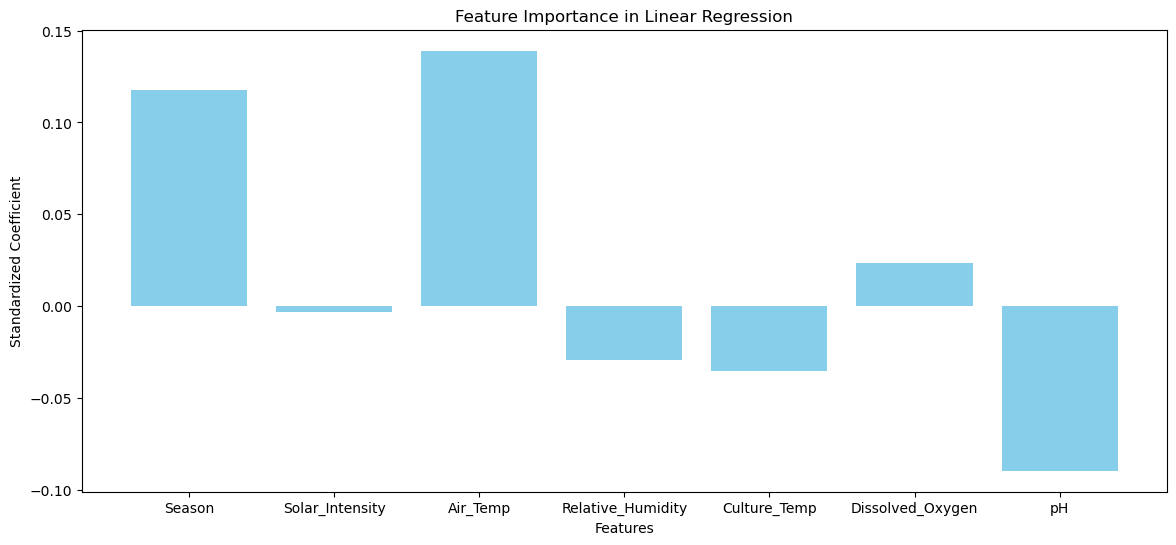

In [42]:
# Coefficients of the standardized features
coefficients = lr.coef_

# Display coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(14, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Standardized Coefficient')
plt.title('Feature Importance in Linear Regression')
plt.show()

# Random forest regressor

In [43]:
# retrive class of randomeforest regressor from scikit learn and create rf object of that class
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [44]:
# Training the RF model
rf.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
# y_pred1 will have predicted value for biomass for 2 test points
y_pred1 = rf.predict(X_test)

# RFregressor metrics

In [46]:
print('MAE:', mean_absolute_error(y_test,y_pred1))
print('MSE:', mean_squared_error(y_test,y_pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred1)))
print('r2_score: ',r2_score(y_test,y_pred1))

MAE: 0.02239999999999928
MSE: 0.0009945999999999714
RMSE: 0.031537279527568185
r2_score:  0.9834302374010834


# Feature importance of RFregressor model

             Feature  Importance
0             Season    0.304666
1    Solar_Intensity    0.005058
2           Air_Temp    0.014266
3  Relative_Humidity    0.476109
4       Culture_Temp    0.018996
5   Dissolved_Oxygen    0.071506
6                 pH    0.109399


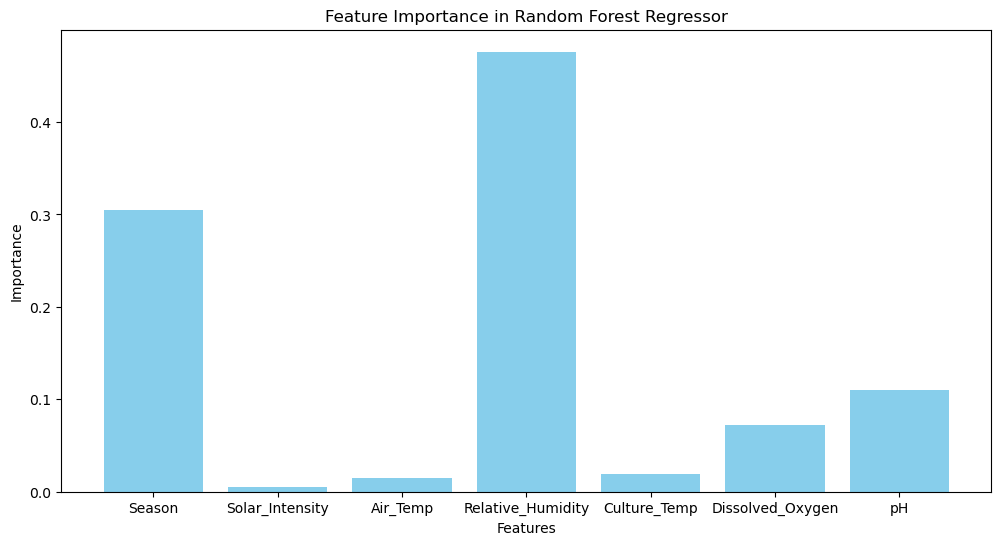

In [47]:
importances = rf.feature_importances_

# Display feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

print(feature_importance_rf)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

In [48]:
y_pred1

array([0.8002, 0.3546])